In [30]:
import graphviz
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [32]:
df = pd.read_csv("HittersNoSchmidtNorKennedy.csv")[["Years", "CHits", "HmRun", "Salary"]]
df = df[df.Salary > 0]
X = df[["Years", "CHits", "HmRun"]].values
y = df.Salary.values
df

,Years,CHits,HmRun,Salary
1,14,835,7,475.0
2,3,457,18,480.0
3,11,1575,20,500.0
4,2,101,10,91.5
5,11,1133,4,750.0
...,...,...,...,...
315,5,806,7,700.0
316,12,1511,5,875.0
317,6,433,3,385.0
318,8,857,9,960.0


In [24]:
M = DecisionTreeRegressor(max_depth=1)

In [29]:
M.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

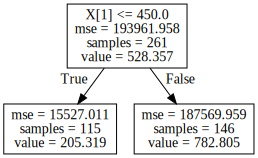

In [31]:
dot_data = tree.export_graphviz(M, out_file=None) 
G = graphviz.Source(dot_data)
G

In [39]:
mse = np.var(y)
print(f"{mse:.3f}")

193961.958


In [50]:
n = len(X)
j = 1
s = 450
IL = X[:,j] <= 450
IR = X[:,j] > 450
XL = X[IL, :]
XR = X[IR, :]
yL = y[IL]
yR = y[IR]
nL = len(XL)
nR = len(XR)
print(f"nL = {nL}\nnR = {nR}")

nL = 115
nR = 146


In [47]:
valL = np.mean(yL)
valR = np.mean(yR)

print(f"left value = {valL:.3f}\nright value = {valR:.3f}")

left value = 205.319
right value = 782.805


In [49]:
mseL = np.var(yL)
mseR = np.var(yR)

print(f"left mse = {mseL:.3f}\nright mse = {mseR:.3f}")

left mse = 15527.011
right mse = 187569.959


In [51]:
decrease = mse - nL/n*mseL - nR/n*mseR

In [52]:
decrease

82196.36274946519